# Instalar os pacotes necessários

(Necessário apenas na primeira vez que utilizar tais pacotes)

In [1]:
!pip install --upgrade pip
!pip install requests_oauthlib

# Chamar os pacotes que serão utilizados ao longo do código

In [5]:
import json
import matplotlib.pyplot as plt
import pandas as pd
import requests
import warnings
from time import gmtime, strftime
from requests_oauthlib import OAuth1Session

warnings.filterwarnings('ignore')

## Autenticação

In [6]:
#API_KEY = "9BGmFKNASlFUv7j7EVwVvUSOr"
#API_SECRET = "Z3TluNxqAmjIQoEoYU8Hh7fmEbWOKKcjYxaizBzYiK9HpZLv3N"
#ACCESS_TOKEN = "2678203501-jMwrB91mYDppQkqUOp3HGsJPT0GGvyPERhQaxpy"
#ACCESS_TOKEN_SECRET = "TUgbMAL53Jd9veKVti6de7f0c1LOmBVtnGEUmHgPPsdVW"

In [7]:
API_KEY = "XIlGfwgJX8ubCE7R5XxayaGN9"
API_SECRET = "BIh5wYEC8EWcBfdrP9qtKJOF4zg04hVOfxxAt4uZ7AVINeJJnt"
ACCESS_TOKEN = "2678203501-jZFsJjk0LO7dywVZRLcEZgC3jzZCn3XogPSpSPa"
ACCESS_TOKEN_SECRET = "MiAwMgECSMBNKhgecFVAxaQcK7wDxJdbroMgxEFzwimpY"

In [8]:
session = OAuth1Session(API_KEY, API_SECRET, ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

## Realizando a busca de fato

### Descobrindo como caracteres especiais devem ser utilizados na busca

In [9]:
TWITTER_URL = 'https://api.twitter.com/1.1/search/tweets.json'
url = TWITTER_URL+'?q=globoplay%20assedio&count=10' # concatenando 2 strings

response = session.get(url)
print(response.status_code)

200


Formas de concatenar STRING

In [10]:
"O nome dele é " + "Leonardo"

'O nome dele é Leonardo'

In [11]:
"Ele tem "+10+" anos"

TypeError: can only concatenate str (not "int") to str

In [ ]:
"Ele tem {} anos".format(10)

E o retorno da API?

In [12]:
response.content

b'{"statuses":[{"created_at":"Thu Oct 18 18:37:13 +0000 2018","id":1052992008879521793,"id_str":"1052992008879521793","text":"RT @globoplay: Todos os epis\\u00f3dios de #Ass\\u00e9dio est\\u00e3o dispon\\u00edveis: https:\\/\\/t.co\\/cjnayQ2ZfO https:\\/\\/t.co\\/5C2KADgM3p","truncated":false,"entities":{"hashtags":[{"text":"Ass\\u00e9dio","indices":[37,45]}],"symbols":[],"user_mentions":[{"screen_name":"globoplay","name":"globoplay","id":55569724,"id_str":"55569724","indices":[3,13]}],"urls":[{"url":"https:\\/\\/t.co\\/cjnayQ2ZfO","expanded_url":"http:\\/\\/bit.ly\\/AssedioGloboplay","display_url":"bit.ly\\/AssedioGlobopl\\u2026","indices":[65,88]}],"media":[{"id":1052019902779981825,"id_str":"1052019902779981825","indices":[89,112],"media_url":"http:\\/\\/pbs.twimg.com\\/amplify_video_thumb\\/1052019902779981825\\/img\\/cWHEYSFfbfUW4FVt.jpg","media_url_https":"https:\\/\\/pbs.twimg.com\\/amplify_video_thumb\\/1052019902779981825\\/img\\/cWHEYSFfbfUW4FVt.jpg","url":"https:\\/\\/t.co\\

In [13]:
print(requests.utils.quote("globoplay assedio"))

globoplay%20assedio


In [14]:
print(requests.utils.quote("#globoplay"))

%23globoplay


### Trabalhando os dados retornados

In [15]:
result_json = json.loads(response.content)
print(result_json.keys())

dict_keys(['statuses', 'search_metadata'])


In [16]:
tweets = result_json['statuses']

In [17]:
print(len(tweets))

10


In [18]:
print(type(tweets[0]))

<class 'dict'>


In [19]:
print(tweets[0].keys())

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'extended_entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'possibly_sensitive', 'lang'])


In [20]:
print(tweets[5]['text'])

não vou nem tentar assistir Assédio do Globoplay, pra quem já sofreu abuso sexual é mt pesado não da


In [21]:
print(tweets[5]['user'].keys())

dict_keys(['id', 'id_str', 'name', 'screen_name', 'location', 'description', 'url', 'entities', 'protected', 'followers_count', 'friends_count', 'listed_count', 'created_at', 'favourites_count', 'utc_offset', 'time_zone', 'geo_enabled', 'verified', 'statuses_count', 'lang', 'contributors_enabled', 'is_translator', 'is_translation_enabled', 'profile_background_color', 'profile_background_image_url', 'profile_background_image_url_https', 'profile_background_tile', 'profile_image_url', 'profile_image_url_https', 'profile_banner_url', 'profile_link_color', 'profile_sidebar_border_color', 'profile_sidebar_fill_color', 'profile_text_color', 'profile_use_background_image', 'has_extended_profile', 'default_profile', 'default_profile_image', 'following', 'follow_request_sent', 'notifications', 'translator_type'])


In [22]:
print(tweets[1]['user']['name'])

david


## Paginando as buscas

Como se fosse o resultado de uma busca no Google

* Os primeiros 10 resultados são exibidos

* Importante lembrar que o twitter retorna as mensagens ordenadas da mais recente para a mais antiga,
  e os IDs das mensagens são retornados do maior ID para o menor ID.
https://developer.twitter.com/en/docs/tweets/timelines/guides/working-with-timelines.html

* Para ver a próxima página, é necessário informar o menor ID-1 retornado na busca anterior 



In [23]:
result_json['search_metadata']

{'completed_in': 0.05,
 'max_id': 1052992008879521793,
 'max_id_str': '1052992008879521793',
 'next_results': '?max_id=1052945242503213056&q=globoplay%20assedio&count=10&include_entities=1',
 'query': 'globoplay+assedio',
 'refresh_url': '?since_id=1052992008879521793&q=globoplay%20assedio&include_entities=1',
 'count': 10,
 'since_id': 0,
 'since_id_str': '0'}

In [2]:
next_results = result_json['search_metadata']
next_results

NameError: name 'result_json' is not defined

In [23]:
response = session.get(TWITTER_URL+next_results)
print(response.status_code)

200


## Recapitulando ...

In [26]:
# Método para conferir que o menor ID está na última posição e o maior ID está na primeira posição
def get_ids(tweets):
    min_id = 0
    max_id = 0
    for i, tweet in enumerate(tweets):
        if tweet['id'] > max_id:
            max_id = tweet['id']
            print('Maximo na posicao {} => {}'.format(i, max_id))
        if tweet['id'] < max_id:
            min_id = tweet['id']
            print('Minimo na posicao {} => {}'.format(i, min_id))  
    return min_id, max_id

# Método para obter a paginação de forma manual
def get_next_results(tweets, url):
    #min_id, max_id = get_ids(result_json['statuses'])
    max_id = tweets[0]['id']
    min_id = tweets[-1]['id']
    return '{}&max_id={}'.format(url, min_id-1)

In [27]:
# Constantes
TWITTER_URL = 'https://api.twitter.com/1.1/search/tweets.json' # STRING
SEARCH_URL = '?q=globoplay%20assedio&count=100'
N_PAGES = 5

# Variáveis
next_results = SEARCH_URL # STRING
page = 1    # INTEIRO
tweets = [] # LISTA

while next_results is not None and page < N_PAGES: # LOOP
    print("##############")

    response = session.get(TWITTER_URL+next_results)
    if response.status_code != 200:
        print("A página retornou código {}".format(response.status_code))
        break        
    result_json = json.loads(response.content)   

    if not len(result_json['statuses']):
        print("Nenhum tweet retornado")
        break
    tweets_json = result_json['statuses']
    print("Dados carregados - página {} => {} tweets".format(page, len(tweets_json)))

    # Paginação usando o resultado do JSON
    if 'next_results' in result_json['search_metadata']:
        next_results = result_json['search_metadata']['next_results']
    else:
        #next_results = None
        next_results = get_next_results(tweets_json, SEARCH_URL)
    print(next_results)

    page = page+1
    
    # Carregando os resultados
    tweets.extend(tweets_json)

##############
Dados carregados - página 1 => 100 tweets
?max_id=1052691291203559423&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 2 => 98 tweets
?q=globoplay%20assedio&count=100&max_id=1052147976737579008
##############
Dados carregados - página 3 => 100 tweets
?max_id=1052032179801387008&q=globoplay%20assedio&count=100&include_entities=1
##############
Dados carregados - página 4 => 100 tweets
?max_id=1052023862978859008&q=globoplay%20assedio&count=100&include_entities=1


## Transformando a lista de Tweets em uma estrutura do pandas (Dataframe)

In [32]:
df = pd.DataFrame(tweets)
df

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,metadata,place,possibly_sensitive,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,None,None,Thu Oct 18 18:37:13 +0000 2018,"{'hashtags': [{'text': 'Assédio', 'indices': [...","{'media': [{'id': 1052019902779981825, 'id_str...",0,False,None,1052992008879521793,1052992008879521793,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,True,47,False,{'created_at': 'Tue Oct 16 02:19:37 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @globoplay: Todos os episódios de #Assédio ...,False,"{'id': 2307034963, 'id_str': '2307034963', 'na..."
1,None,None,Thu Oct 18 18:02:03 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052983159225274369,1052983159225274369,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,0,False,NaN,"<a href=""https://about.twitter.com/products/tw...","esse série ""assédio"" é boa, quem tiver globopl...",False,"{'id': 968239519240736769, 'id_str': '96823951..."
2,None,None,Thu Oct 18 17:39:20 +0000 2018,"{'hashtags': [{'text': 'Assédio', 'indices': [...","{'media': [{'id': 1052019902779981825, 'id_str...",0,False,None,1052977442791538688,1052977442791538688,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,False,47,False,{'created_at': 'Tue Oct 16 02:19:37 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @globoplay: Todos os episódios de #Assédio ...,False,"{'id': 218082921, 'id_str': '218082921', 'name..."
3,None,None,Thu Oct 18 17:38:50 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052977316408844288,1052977316408844288,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,154,False,{'created_at': 'Wed Oct 17 22:30:00 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @QuebrandoOTabu: Uma série escrita por uma ...,False,"{'id': 966397588160335872, 'id_str': '96639758..."
4,None,None,Thu Oct 18 17:38:04 +0000 2018,"{'hashtags': [{'text': 'Assédio', 'indices': [...",NaN,0,False,None,1052977122485198849,1052977122485198849,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,25,False,{'created_at': 'Mon Oct 15 19:30:01 +0000 2018...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...","RT @gshow: Nesta segunda, 15, será exibido o p...",False,"{'id': 218082921, 'id_str': '218082921', 'name..."
5,None,None,Thu Oct 18 16:54:32 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052966168707911680,1052966168707911680,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",não vou nem tentar assistir Assédio do Globopl...,False,"{'id': 1653432223, 'id_str': '1653432223', 'na..."
6,None,None,Thu Oct 18 16:42:42 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052963190974423040,1052963190974423040,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,False,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...",Assédio | Stela | Globoplay https://t.co/Q9qwh...,False,"{'id': 246524792, 'id_str': '246524792', 'name..."
7,None,None,Thu Oct 18 16:30:49 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052960198862745606,1052960198862745606,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,154,False,{'created_at': 'Wed Oct 17 22:30:00 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @QuebrandoOTabu: Uma série escrita por uma ...,False,"{'id': 996523294923874305, 'id_str': '99652329..."
8,None,None,Thu Oct 18 16:29:36 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,None,1052959894381481985,1052959894381481985,...,"{'iso_language_code': 'pt', 'result_type': 're...",None,NaN,154,False,{'created_at': 'Wed Oct 17 22:30:00 +0000 2018...,"<a href=""http://twitter.com/downloa

### Salvando os dados em CSV para backup ou para trabalhar em excel, R, etc.

In [33]:
filename = 'Dados/tweets_globoplay_{}.csv'.format(strftime("%Y%m%d_%H%M%S", gmtime()))
df.to_csv(filename, index=False)
print(filename)

Dados/tweets_globoplay_20181018_191502.csv


In [29]:
# Dados/tweets_globoplay_20181018_142809.csv
df2 = pd.read_csv('Dados/tweets_globoplay_20181018_141711.csv')
df2.head(10)

,contributors,coordinates,created_at,entities,extended_entities,favorite_count,favorited,geo,id,id_str,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,text,truncated,user
0,NaN,NaN,Thu Oct 18 14:01:11 +0000 2018,"{'hashtags': [{'text': 'GreysAnatomy', 'indice...",NaN,0,False,NaN,1052922543336775680,1052922543336775680,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Maratonando #GreysAnatomy com a @NetflixBrasil...,True,"{'id': 419912818, 'id_str': '419912818', 'name..."
1,NaN,NaN,Thu Oct 18 14:01:09 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052922535535398913,1052922535535398913,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...","\0/ E saber que o nosso município, Morada Nova...",False,"{'id': 323937112, 'id_str': '323937112', 'name..."
2,NaN,NaN,Thu Oct 18 14:00:10 +0000 2018,"{'hashtags': [{'text': 'BomDiaFronteira', 'ind...",NaN,0,False,NaN,1052922289589809153,1052922289589809153,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://www.facebook.com/twitter"" rel=...","Situação foge do ""comum"", pois valores mais ba...",True,"{'id': 78672964, 'id_str': '78672964', 'name':..."
3,NaN,NaN,Thu Oct 18 13:59:17 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052922066490576897,1052922066490576897,...,NaN,NaN,NaN,5,False,{'created_at': 'Thu Oct 18 13:37:40 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @BomDiaBrasil: Caminhão de água usado para ...,False,"{'id': 334505071, 'id_str': '334505071', 'name..."
4,NaN,NaN,Thu Oct 18 13:57:22 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052921583629717504,1052921583629717504,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",Pra lembrarem e nunca esquecerem quem é Renan ...,False,"{'id': 892797194323013632, 'id_str': '89279719..."
5,NaN,NaN,Thu Oct 18 13:51:35 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052920129460285440,1052920129460285440,...,NaN,NaN,NaN,9,False,{'created_at': 'Thu Jul 19 12:19:34 +0000 2018...,"<a href=""http://twitter.com/download/android"" ...",RT @portoelis: VÍDEO SHOW✨\nVídeo Show - Progr...,False,"{'id': 608643563, 'id_str': '608643563', 'name..."
6,NaN,NaN,Thu Oct 18 13:51:20 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052920066642247681,1052920066642247681,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",.Um absurdo. https://t.co/GeBsuuZk0w,False,"{'id': 485253554, 'id_str': '485253554', 'name..."
7,NaN,NaN,Thu Oct 18 13:48:37 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,1,False,NaN,1052919379904647168,1052919379904647168,...,NaN,NaN,NaN,0,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...","Acabei de ver a novela, graças a Deus minha ir...",False,"{'id': 955505248176623616, 'id_str': '95550524..."
8,NaN,NaN,Thu Oct 18 13:45:37 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052918626460856320,1052918626460856320,...,NaN,NaN,NaN,9,False,{'created_at': 'Thu Oct 18 04:22:39 +0000 2018...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @JornalDaGlobo: PF conclui que Temer editou...,False,"{'id': 250190103, 'id_str': '250190103', 'name..."
9,NaN,NaN,Thu Oct 18 13:44:30 +0000 2018,"{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,NaN,1052918346742751232,1052918346742751232,...,NaN,NaN,NaN,5,False,{'created_at': 'Thu Oct 18 13:37:40 +0000 2018...,"<a href=""http://twitter.com/download/iphone"" r...",RT @BomDiaBrasil: Caminhão de água usado para ...,False,"{'id': 54403703, 'id_str': '54403703', 'name':..."


## Analisando o resultado

In [34]:
print('Quantidade de tweets únicos: {}'.format(len(df.id.unique())))
df.describe()

Quantidade de tweets únicos: 398


,favorite_count,id,in_reply_to_status_id,in_reply_to_user_id,retweet_count
count,398.000000,3.980000e+02,9.000000e+00,1.100000e+01,398.000000
mean,2.198492,1.052332e+18,1.052298e+18,7.071682e+16,86.339196
std,39.847737,3.286479e+14,2.265446e+14,2.345411e+17,59.723359
min,0.000000,1.052024e+18,1.052017e+18,1.821998e+07,0.000000
25%,0.000000,1.052032e+18,1.052047e+18,5.556972e+07,25.000000
50%,0.000000,1.052123e+18,1.052376e+18,7.917170e+07,87.000000
75%,0.000000,1.052691e+18,1.052386e+18,8.385569e+08,154.000000
max,795.000000,1.052992e+18,1.052693e+18,7.778850e+17,154.000000


### Selecionando as colunas desejadas.

In [35]:
df_created = df[['created_at', 'text']]
df_created.describe()

,created_at,text
count,398,398
unique,389,100
top,Wed Oct 17 22:31:02 +0000 2018,RT @QuebrandoOTabu: Uma série escrita por uma ...
freq,2,127


In [36]:
df_created

,created_at,text
0,Thu Oct 18 18:37:13 +0000 2018,RT @globoplay: Todos os episódios de #Assédio ...
1,Thu Oct 18 18:02:03 +0000 2018,"esse série ""assédio"" é boa, quem tiver globopl..."
2,Thu Oct 18 17:39:20 +0000 2018,RT @globoplay: Todos os episódios de #Assédio ...
3,Thu Oct 18 17:38:50 +0000 2018,RT @QuebrandoOTabu: Uma série escrita por uma ...
4,Thu Oct 18 17:38:04 +0000 2018,"RT @gshow: Nesta segunda, 15, será exibido o p..."
5,Thu Oct 18 16:54:32 +0000 2018,não vou nem tentar assistir Assédio do Globopl...
6,Thu Oct 18 16:42:42 +0000 2018,Assédio | Stela | Globoplay https://t.co/Q9qwh...
7,Thu Oct 18 16:30:49 +0000 2018,RT @QuebrandoOTabu: Uma série escrita por uma ...
8,Thu Oct 18 16:29:36 +0000 2018,RT @QuebrandoOTabu: Uma série escrita por uma ...
9,Thu Oct 18 15:31:23 +0000 2018,RT @QuebrandoOTabu: Uma série escrita por uma ...


### Verificando os tipos das colunas:

In [37]:
df_created.dtypes

created_at    object
text          object
dtype: object

### Convertendo a coluna de data (STRING) para uma coluna do tipo date

In [38]:
df_created['created_at'] = pd.to_datetime(df_created['created_at'])
df_created.dtypes

created_at    datetime64[ns]
text                  object
dtype: object

In [39]:
pd.set_option('display.max_colwidth', -1)
df_created.head(10)

,created_at,text
0,2018-10-18 18:37:13,RT @globoplay: Todos os episódios de #Assédio estão disponíveis: https://t.co/cjnayQ2ZfO https://t.co/5C2KADgM3p
1,2018-10-18 18:02:03,"esse série ""assédio"" é boa, quem tiver globoplay assiste, tem 7 grátis"
2,2018-10-18 17:39:20,RT @globoplay: Todos os episódios de #Assédio estão disponíveis: https://t.co/cjnayQ2ZfO https://t.co/5C2KADgM3p
3,2018-10-18 17:38:50,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
4,2018-10-18 17:38:04,"RT @gshow: Nesta segunda, 15, será exibido o primeiro capítulo de #Assédio em um especial, logo após 'Segundo Sol'. Os assinantes do Globop…"
5,2018-10-18 16:54:32,"não vou nem tentar assistir Assédio do Globoplay, pra quem já sofreu abuso sexual é mt pesado não da"
6,2018-10-18 16:42:42,Assédio | Stela | Globoplay https://t.co/Q9qwhyTgH2
7,2018-10-18 16:30:49,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
8,2018-10-18 16:29:36,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"
9,2018-10-18 15:31:23,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…"


### Visualizando os dados por dia.

Lembrando que esta API traz os resultados dos últimos 7 dias.

In [54]:
df_created['day'] = df_created['created_at'].dt.day
df_created.head()

,created_at,text,day
0,2018-10-18 14:24:21,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18
1,2018-10-18 14:09:46,RT @ETerminamos: Os vários atos criminosos cometidos por Roger Abdelmassih #NaoforamAssédiosForamEstupros\n#Assédio #globoplay #SegundaDetr…,18
2,2018-10-18 12:47:17,"RT @guedespri05: Tô assistindo a série Assédio da @RedeGlobo @globoplay !!! Adriana Esteves dando um show, o que já é normal!! Totalmente s…",18
3,2018-10-18 12:45:24,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18
4,2018-10-18 12:12:54,"RT @QuebrandoOTabu: Uma série escrita por uma mulher, dirigida por uma mulher e protagonizada por mulheres. (E com a Adriana Esteves ❤️)\n'A…",18


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1247e7898>]],
      dtype=object)

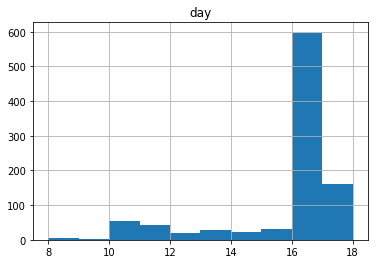

In [55]:
df_created.hist()

### Visualizando os dados dos dias 15 e 16 por horário

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x120d3e198>,
      dtype=object)

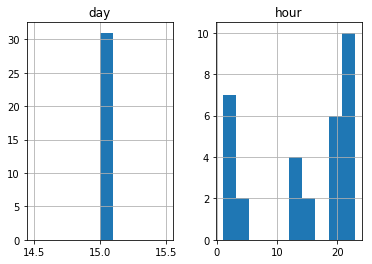

In [56]:
df_created_15 = df_created[df_created['created_at'].dt.day == 15]
df_created_15['hour'] = df_created_15['created_at'].dt.hour
df_created_15.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x124805fd0>,
      dtype=object)

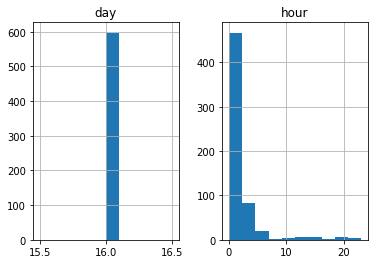

In [57]:
df_created_16 = df_created[df_created['created_at'].dt.day == 16]
df_created_16['hour'] = df_created_16['created_at'].dt.hour
df_created_16.hist()